<a href="https://colab.research.google.com/github/diogomattos1/mvp-machine-learning/blob/main/MVP_Machine_Learning_Diogo_Mattos_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**MVP**

***Disciplina de Machine Learning***

*Diogo Oliveira Paiva Mattos*


**Introdução**


Fundada em 1946, nos Estados Unidos, a NBA (National Basketball Association) é a principal liga de basquete profissional do mundo.

A partir de meados dos anos 2000, houve uma revolução estatística nos esportes nos Estados Unidos. Inicialmente ela ocorreu no baseball, o que foi retratado no livro Moneyball (2003), de Michael Lewis - que ganhou uma versão cinematográfica em 2011, dirigida por Bennett Miller e estrelada por Brad Pitt. Logo esta onda chegou no basquete.

Com este interesse, "nerds" ganharam espaço na imprensa especializada e nas próprias equipes da NBA, que passaram a ter departamentos de estatística. Houve um desenvolvimento de novas métricas, e o avanço da tecnologia permitiu que se medisse novos aspectos do esporte.

O impacto disso começou a ser percebido a partir dos anos 2010, com uma mudança brusca na forma de jogar basquete profissionalmente. As equipes passaram a priorizar arremessos de 3 pontos, em detrimento de um jogo mais físico próximo à cesta. O Golden State Warriors foi a equipe que melhor sintetizou esta tendência, sendo 6 vezes finalista da liga a partir de 2015, e vencendo 4 campeonatos no período. Seu principal jogador, Stephen Curry, foi eleito duas vezes o melhor jogador da temporada. Ele é considerado por muitos comentaristas o melhor arremessador de 3 pontos da história.





**Proposta**

A proposta deste MVP é, partindo de um dataset bem abrangente - apresentando todos os dados que a liga tem registro desde a temporada de 1946-47 em apresente 22 arquivos - testar diferentes modelos de machine learning a fim de tentar prever o sucesso de uma equipe em uma temporada.

Iremos considerar algumas idéias apresentadas no MVP da disciplina de Análise de Dados, mas queremos fazer um trabalho totalmente independente do anterior. Até porque o conhecimento trazido pelas aulas do módulo de Machine Learning ampliou a visão que tínhamos sobre como tratar este problema.

Entretanto, assim como o MVP anterior, não desejamos elaborar um modelo abrangente a ponto de tratar todo o histórico da liga. Queremos trabalhar com os dados a partir do momento em que houve esta mudança de abordagem no jogo, priorizando os arremessos de 3 pontos. Para isso, vamos precisar analisar os dados antes de definir este "ponto de corte".

**Dados**

O dataset que será base do trabalho foi obtido no site Kaggle e salvo no github: https://github.com/diogomattos1/mvp-analise-dados/tree/dataset. Este foi o mesmo utilizado no MVP de Análise de Dados.

Este conjunto é bem completo, apresentando todos os dados que a liga tem registro desde a temporada de 1946-47. Apresenta informações tanto das equipes quanto dos jogadores.

O MVP de Análise de Dados trabalhou com as chamadas "estatísticas avançadas", que são fórmulas elaboradas por estudiosos do basquete com o objetivo de mensurar melhor o sucesso das equipes. Entretanto, estas fórmulas muitas vezes trazem números que são diretamente relacionados à variável que iremos determinar como o sucesso de uma equipe: o percentual de vitórias de cada time em cada temporada. Por exemplo, uma das variáveis deste dataset, chamada SOS, tem em sua fórmula o percentual de vitórias e derrotas dos adversários de uma equipe. Um atributo que contenha esta informação, que seria a nossa variável "target", poderia trazer vazamento de dados ao conjunto.

Assim, iremos mudar um pouco a abordagem do trabalho anterior em testar estas estatísticas avançadas, e nos concentrar apenas nos dados do "box score", ou seja, aqueles que são anotados pela mesa de árbitros de uma partida: pontos, rebotes, assistências, tocos, roubadas de bola, desperdícios de posse de bola, faltas, quantidade de tentativas e de acertos de cada tipo de arremesso - 3 pontos, 2 pontos ou lance livre. Também traremos o oposto: para estes mesmos atributos, qual foi a média dos adversários de cada equipe.

Entretanto, iremos adotar aqui um ponto que foi trazido apenas a partir da era das estatísticas avançadas: convencionou-se trazer a eficiencia dos times a cada 100 posses de bola, ao invés de um índice por partida. Isso de certa forma equaliza a mensuração das equipes que tem mais possos de bola por partida, pois algumas preferem atacar a cesta o mais rápido possível, enquanto outras gastam ao máximo o tempo permitido antes de arremessar. Convencionou-se adotar 100 por ser um valor "redondo" próximo à média histórica de posses de bola por partida. Acreditamos que este tratamento pode evitar que equipes que sejam mais rápidas tenham seus números inflados, e isso possa trazer distorções ao modelo.

Então, nosso dataset será composto pelas médias por temporada de cada equipe por 100 posses de bola, ao invés de por partida. Assim, dos 22 arquivos .csv do dataset, iremos nos concentrar em apenas 4 deles.

Nosso objetivo será tentar avaliar se algum modelo de regressão de machine learning consegue trazer, com alguma precisão, quantas partidas uma equipe vencerá na liga baseado nestas médias.

**Análise e pré-processamento dos dados**

Embora a análise e o pré-processamento de dados sejam etapas distintas do trabalho, achamos que seria mais didático intercalar entre as duas: ao analisar uma parte dos dados, já realizar o seu pré-processamento, e daí retomar a análise.

Para começar, vamos importar as bibliotecas e os arquivos do dataset.

In [ ]:
# Importar de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Informar a URL onde um dos arquivos do dataset foi armazenado
# Obs: neste caso, seguindo orientação dos professores, os arquivos baixados do Kaggle foram salvos no Github

url = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Stats%20Per%20100%20Poss.csv"
url2 = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/refs/heads/dataset/Opponent%20Stats%20Per%20100%20Poss.csv"
url3 = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Summaries.csv"
url4 = "https://raw.githubusercontent.com/diogomattos1/mvp-analise-dados/dataset/Team%20Stats%20Per%20Game.csv"

In [ ]:
# Ler os arquivos
df = pd.read_csv(url, delimiter=',')
df2 = pd.read_csv(url2, delimiter=',')
df3 = pd.read_csv(url3, delimiter=',')
df4 = pd.read_csv(url4, delimiter=',')

Apenas os dois primeiros arquivos serão aproveitados em sua totalidade. Os outros dois apresentam apenas duas informações que serão necessárias para a nossa coluna "target", que será o percentual de vitórias. Este será obtido justamente com a divisão de "w" (wins) por "g" (games).

Esta transformação é necessária, pois nem todas as temporadas tiveram o mesmo número de partidas. Um exemplo é a temporada de 2019-20, que teve seu número de jogos reduzido por causa da pandemia de COVID-19.

In [ ]:
# Selecionar apenas as colunas 'g' e 'w' do df_url3 e  df_url4
df3 = df3[['team', 'season', 'w']]
df4 = df4[['team', 'season', 'g']]

In [ ]:
# Realizar o merge entre os dois primeiros arquivos
df_merge = pd.merge(df, df2, on=['season', 'team'])

# Fazer a junção com a coluna "g"
df_merge = pd.merge(df_merge, df4, on=['team', 'season'], how='left')

# Fazer a junção com a coluna "w"
df_merge = pd.merge(df_merge, df3, on=['team', 'season'], how='left')

In [ ]:
# Criar a coluna target - 'w%'
df_merge['w%'] = (df_merge['w'] / df_merge['g'])

# Remover as colunas 'g', 'w' do dataframe
df_merge.drop(['g', 'w'], axis=1, inplace=True)

#print(df_merge)

In [ ]:
# Exibir os tipos de cada campo da tabela do dataframe
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 1402 non-null   int64  
 1   lg_x                   1402 non-null   object 
 2   team                   1402 non-null   object 
 3   abbreviation_x         1402 non-null   object 
 4   playoffs_x             1402 non-null   bool   
 5   g_x                    1402 non-null   int64  
 6   mp_x                   1402 non-null   int64  
 7   fg_per_100_poss        1402 non-null   float64
 8   fga_per_100_poss       1402 non-null   float64
 9   fg_percent             1402 non-null   float64
 10  x3p_per_100_poss       1283 non-null   float64
 11  x3pa_per_100_poss      1283 non-null   float64
 12  x3p_percent            1283 non-null   float64
 13  x2p_per_100_poss       1402 non-null   float64
 14  x2pa_per_100_poss      1402 non-null   float64
 15  x2p_

Antes de fazer uma análise de dados, vamos pré-processar algumas informações, removendo alguns atributos. Percebemos que há colunas repetidas no dataframe (o Pandas as diferenciou acrescentando "_x" ou "_y" ao final de seu nome. Como estes dados não são importantes, (por exemplo, trazem a abreviação de cada time) serão todos excluídos do dataframe.

In [ ]:
# Remover as colunas duplicadas no DataFrame resultante
duplicadas = [col for col in df_merge.columns if '_y' in col]
df_merge.drop(duplicadas, axis=1, inplace=True)

In [ ]:
# Remover as colunas duplicadas no DataFrame resultante
duplicadas = [col for col in df_merge.columns if '_x' in col]
df_merge.drop(duplicadas, axis=1, inplace=True)

Já tendo o dataframe, nosso primeiro objetivo é fazer um corte temporal. Para isso, vamos ver a evolução dos arremessos de 3 pontos ao longo dos anos através destes dois gráficos que foram apresentados mais detalhadamente no MVP de Análise de Dados. Nossa idéia, com isso, é determinar quais aspectos do jogo passaram a influir mais nos jogos a partir do momento que as equipes adotaram com mais frequência este tipo arremesso ao seus repertórios. Será que as cestas de 3 terão mais importância quando testarmos os modelos de regressão machine learning?

Podemos observar que os arremessos e cestas de 3 pontos tiveram um crescimento contínuo (com um pequeno pico na década de 1990, que não será objetivo tratar neste MVP). Após a temporada de 2012, o crescimento passou a ser mais acelerado.

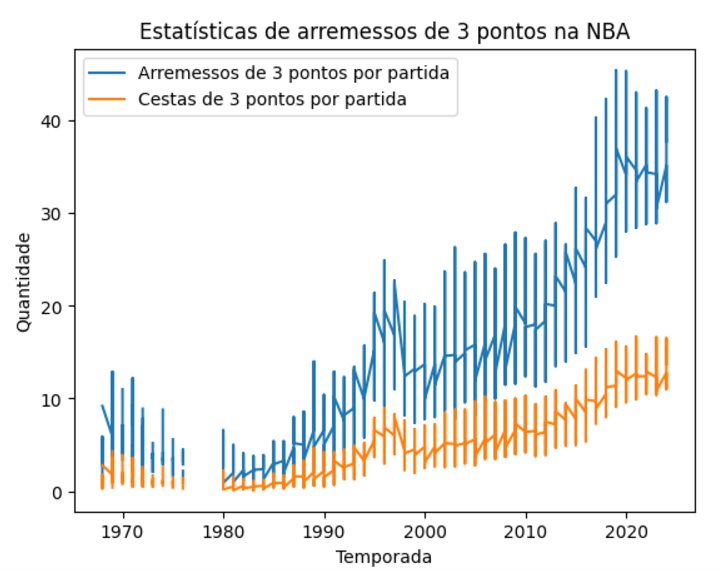

Agora uma outra abordagem: um gráfico comparando a quantidade de arremessos de 3 pontos e de arremessos totais ao longo dos anos. Fica mais evidente que as tentativas de 3 pontos evoluíram constantemente, em detrimento das tentativas de 2 pontos; enquanto que os arremessos em geral se mantiveram relativamente estáveis. Neste gráfico, também verificamos uma aceleração da tendência a partir de 2012.

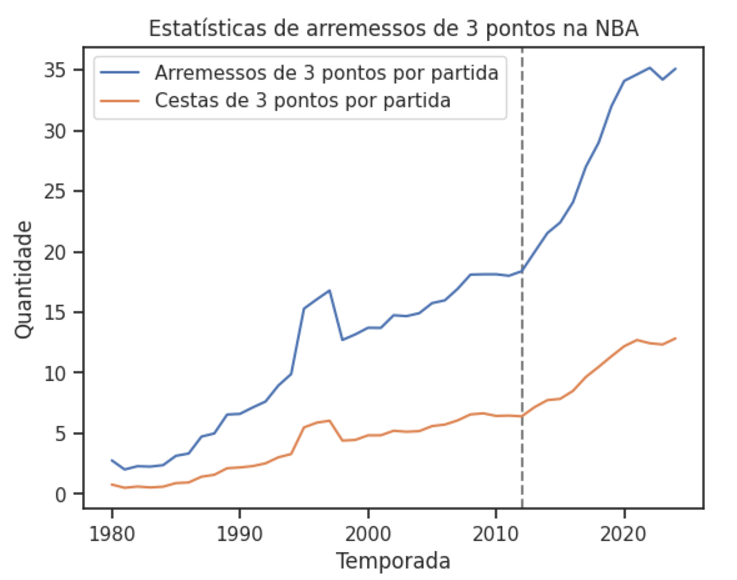

Desta forma, vamos definir a temporada de 2011-12 como "ponto de corte" do nosso conjunto de dados.

In [ ]:
#Filtrar os dataframes com dados apenas a partir da temporada de 2011-2012
df_filtrado2012 = df_merge[df_merge['season'] > 2012]

# Exibir o DataFrame filtrado
print(df_filtrado2012)

     season                team  fg_per_100_poss  fga_per_100_poss  \
0      2024       Atlanta Hawks             42.6              91.6   
1      2024      Boston Celtics             44.9              92.1   
2      2024       Brooklyn Nets             41.7              91.4   
3      2024       Chicago Bulls             43.0              91.6   
4      2024   Charlotte Hornets             41.0              89.2   
..      ...                 ...              ...               ...   
355    2013    Sacramento Kings             39.9              89.2   
356    2013   San Antonio Spurs             41.1              85.6   
357    2013     Toronto Raptors             39.6              88.8   
358    2013           Utah Jazz             40.4              89.1   
359    2013  Washington Wizards             38.2              87.8   

     fg_percent  x3p_per_100_poss  x3pa_per_100_poss  x3p_percent  \
0         0.465              13.6               37.3        0.364   
1         0.487      

In [ ]:
# Exibir a quantidade de linhas por coluna
df_filtrado2012.count()

,0
season,360
team,360
fg_per_100_poss,360
fga_per_100_poss,360
fg_percent,360
x3p_per_100_poss,360
x3pa_per_100_poss,360
x3p_percent,360
x2p_per_100_poss,360
x2pa_per_100_poss,360


Parece contra-intuitivo partir de um dataset com mais de 70 anos de dados e reduzí-lo a apenas 360 linhas, referentes às últimas 12 temporadas. Mas nossa hipótese é a de que, ao longo de tantas décadas, tivemos muita variação de regras, tendência de jogo, táticas, o que poderia levar nossos modelos à confusão. Nos concentrando num período menor, pode ser possível captar alguma tendência com mais precisão.

Além de já termos o recorte temporal desejado, agora também garantimos não ter valores vazios para nenhuma linha e coluna. Já estamos quase prontos para começar efetivamente o trabalho. Só falta excluir os atributos "season" e "team", que não são mais necessários agora que já tratamos tudo o que desejamos inicialmente.

In [ ]:
df_filtrado2012.drop('season',  axis=1, inplace=True)
df_filtrado2012.drop('team',  axis=1, inplace=True)

Tento feito todo este tratamento dos dados, já podemos exibir um sumário estatístico dos dados.

In [ ]:
# Exibe um sumário estatístico (contagem, média, desvio padrão, mínimo, máximo e quartis)
df_filtrado2012.describe()

,fg_per_100_poss,fga_per_100_poss,fg_percent,x3p_per_100_poss,x3pa_per_100_poss,x3p_percent,x2p_per_100_poss,x2pa_per_100_poss,x2p_percent,ft_per_100_poss,...,opp_orb_per_100_poss,opp_drb_per_100_poss,opp_trb_per_100_poss,opp_ast_per_100_poss,opp_stl_per_100_poss,opp_blk_per_100_poss,opp_tov_per_100_poss,opp_pf_per_100_poss,opp_pts_per_100_poss,w%
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,40.669167,88.367222,0.460314,10.633056,29.644167,0.357981,30.032222,58.720833,0.513844,17.803056,...,10.651667,34.094722,44.748611,24.261111,7.827778,4.985278,14.515833,20.488333,109.777222,0.499581
std,1.568499,1.854734,0.016649,2.409624,6.299876,0.016917,2.265661,6.361329,0.029730,1.687482,...,0.950706,1.439417,1.580892,1.731533,0.701058,0.737745,1.298102,1.438905,4.216757,0.148132
min,35.000000,83.000000,0.408000,5.200000,15.200000,0.305000,23.400000,42.600000,0.448000,12.900000,...,8.400000,29.700000,40.900000,19.400000,6.100000,3.100000,11.600000,17.500000,99.000000,0.121951
25%,39.500000,87.100000,0.448000,8.900000,25.075000,0.347000,28.600000,54.375000,0.489750,16.600000,...,10.000000,33.200000,43.600000,23.175000,7.300000,4.500000,13.600000,19.500000,106.775000,0.390244
50%,40.600000,88.400000,0.460500,10.800000,30.200000,0.357000,30.100000,58.100000,0.514000,17.700000,...,10.600000,34.000000,44.700000,24.300000,7.800000,5.000000,14.450000,20.400000,109.750000,0.512195
75%,41.800000,89.600000,0.471000,12.400000,34.100000,0.370000,31.600000,63.175000,0.536000,18.825000,...,11.300000,35.100000,45.700000,25.500000,8.300000,5.400000,15.400000,21.300000,112.800000,0.609756
max,46.100000,94.300000,0.507000,16.900000,46.000000,0.416000,36.600000,76.400000,0.589000,23.600000,...,13.200000,38.500000,49.600000,29.700000,9.900000,7.500000,18.200000,25.000000,120.400000,0.890244


Vamos utilizar a biblioteca seaborn para termos uma noção inicial da existência de maior ou menor correlação entre as informações do conjunto de dados.

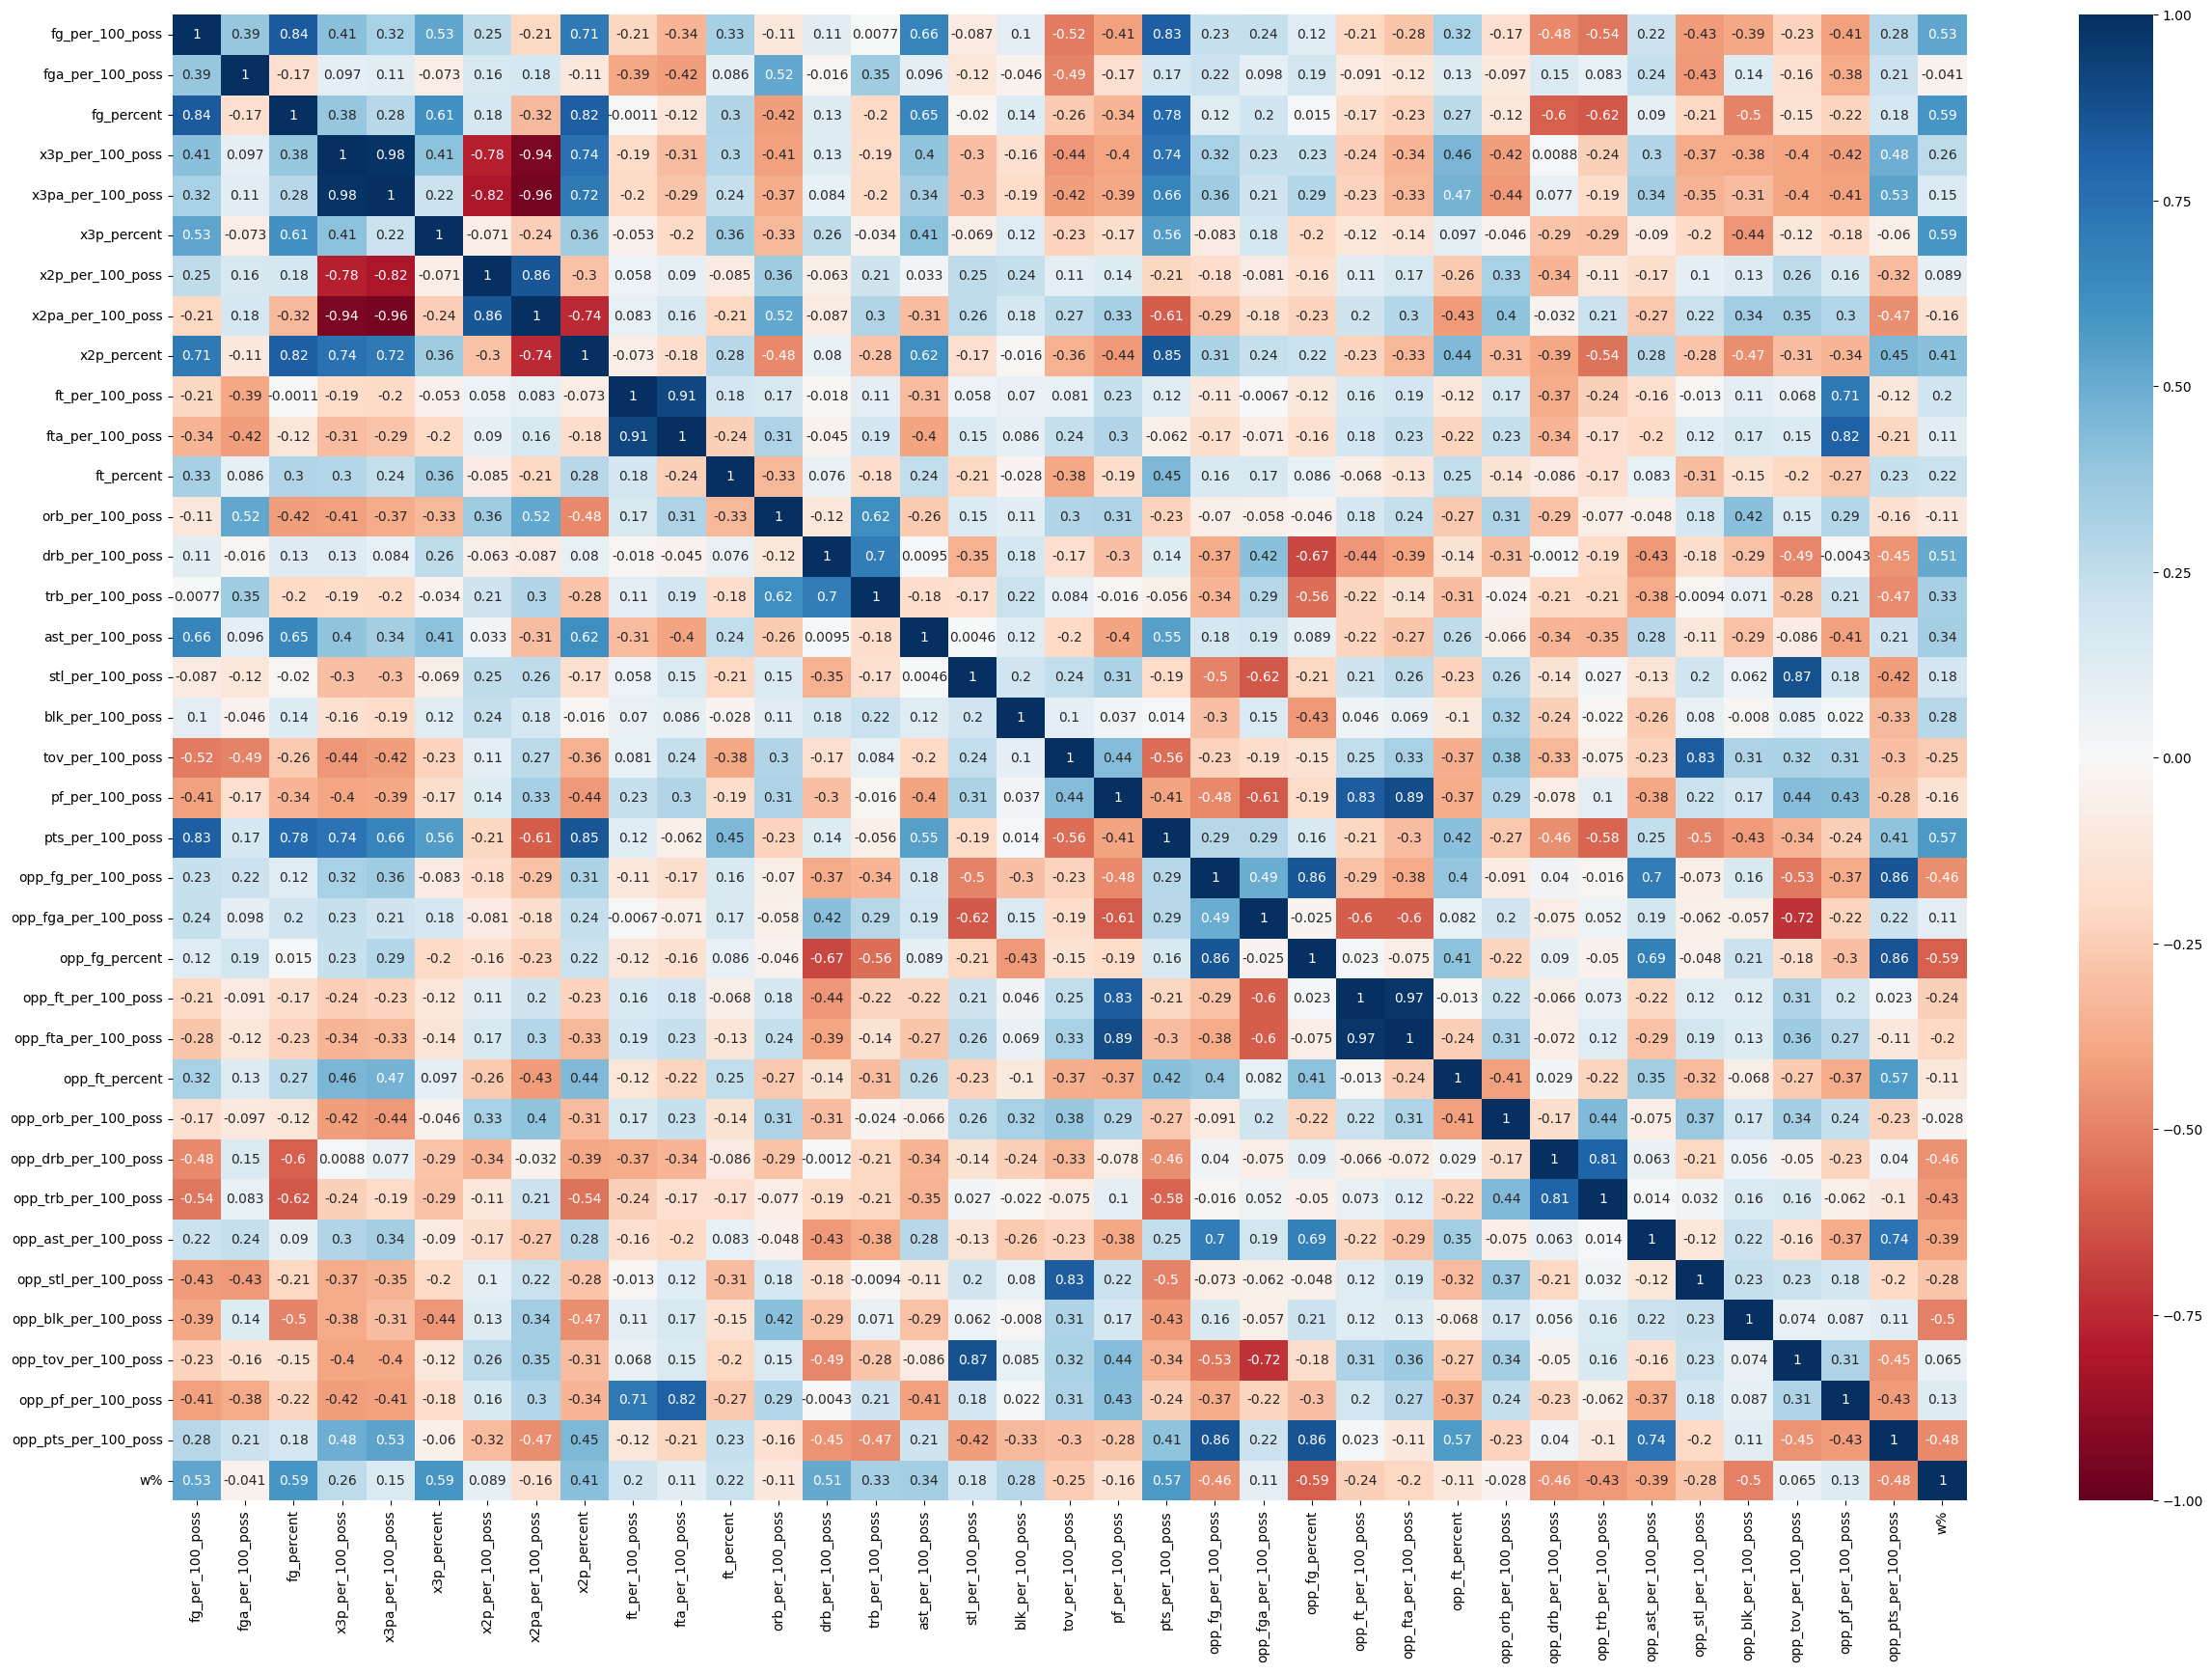

In [ ]:
# Matriz de Correlação com Seaborn

plt.figure(figsize = (30,20))
# The numeric_only=True argument tells the corr() function to only consider numeric columns
sns.heatmap(df_filtrado2012.corr(numeric_only=True), annot=True, cmap='RdBu', vmin=-1, vmax=1);


Podemos notar na última coluna a correlação entre cada atributo do conjunto e o nosso target - o percentual de vitórias. Nenhum atributo individualmente tem correlação considerada forte - acima de 0,7 ou abaixo de -0,7.

**Machine Learning**

Definido o conjunto de dados que será trabalhado, podemos agora passar para efetivamente trabalhá-los com modelos de machine learning.

Inicialmente iremos importar as bibliotecas necessárias e separar os dados entre treino e teste.

In [ ]:
# Imports necessários
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 12 # semente aleatória

# Separação em conjuntos de treino e teste
array = df_filtrado2012.values
X = array[:,0:36] # atributos
y = array[:,36] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout SEM estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

**Feature Selection**

Embora já tenhamos feito anteriormente um pré-processamento para excluir variáveis desnecessárias ou que pudessem trazer vazamento de dados, agora vamos testar alguns algoritmos para executar esta atividade supervisionadamente.

Para isso, optamos por testar quatro métodos de feature selection:

* Lasso Regression.
* Random Forest.
* Regressão Linear com Seleção Passo a Passo.
* Ridge Regression.

In [ ]:
# Teste com 4 métodos de feature selection

# 1. Lasso Regression para Seleção de Variáveis
lasso = LassoCV(alphas=np.logspace(-4, 4, 100), cv=10)  # Usando validação cruzada
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

print("Lasso Regression - Coeficientes:")
for i, coef in enumerate(lasso_coef):
    if coef != 0:
        print(f"Atributo {i}: Coeficiente = {coef}")

# 2. Random Forest para Importância das Variáveis
rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

print("\nRandom Forest - Importância das Variáveis:")
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print(f"Atributo {indices[i]}: Importância = {importances[indices[i]]}")

# 3. Seleção Recursiva de Atributos (RFE) com Regressão Linear
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)  # Seleciona 15 melhores atributos
rfe.fit(X_train, y_train)

print("\nRFE - Atributos Selecionados:")
selected_features = np.where(rfe.support_)[0]
for i in selected_features:
    print(f"Atributo {i}: Selecionado")

# 4. Ridge Regression para Seleção de Variáveis
ridge = RidgeCV(alphas=np.logspace(-4, 4, 100), cv=10)  # Usando validação cruzada
ridge.fit(X_train, y_train)
ridge_coef = ridge.coef_

print("\nRidge Regression - Coeficientes:")
for i, coef in enumerate(ridge_coef):
    print(f"Atributo {i}: Coeficiente = {coef:.8f}")

Lasso Regression - Coeficientes:
Atributo 4: Coeficiente = -0.0011783715451222482
Atributo 10: Coeficiente = -0.00022589528581925655
Atributo 12: Coeficiente = -0.0022181540735944434
Atributo 16: Coeficiente = 0.00041779749040414446
Atributo 17: Coeficiente = -0.0022619797234229135
Atributo 19: Coeficiente = -0.0006936396833356106
Atributo 20: Coeficiente = 0.029979033350919313
Atributo 24: Coeficiente = -0.0029532278313989563
Atributo 27: Coeficiente = 0.003038804662285705
Atributo 29: Coeficiente = 0.0007393025531904937
Atributo 33: Coeficiente = 0.00022609452178318204
Atributo 35: Coeficiente = -0.029008042783442982

Random Forest - Importância das Variáveis:
Atributo 20: Importância = 0.2639650587828831
Atributo 23: Importância = 0.18777307038713664
Atributo 35: Importância = 0.16079364652709138
Atributo 5: Importância = 0.13454110760622195
Atributo 0: Importância = 0.034539345928114674
Atributo 2: Importância = 0.023453844664704196
Atributo 21: Importância = 0.01675141669099423
At

Podemos observar que os métodos apresentam resultados variados. Os modelos Random Forest e Ridge Regression tiveram resultados semelhantes entre si, enquanto os outros modelos trouxeram atributos bem diferentes dos demais. Observando a matriz seaborn que geramos anteriormente, de faot parece que os métodos Lasso Regression e RFE selecionaram atributos com pouca correlação com o target. Desta forma, nossa opção será o método Random Forest. Por não termos certeza de quais interações entre os atributos podem ser relevantes, ele parece uma escolha adequada.

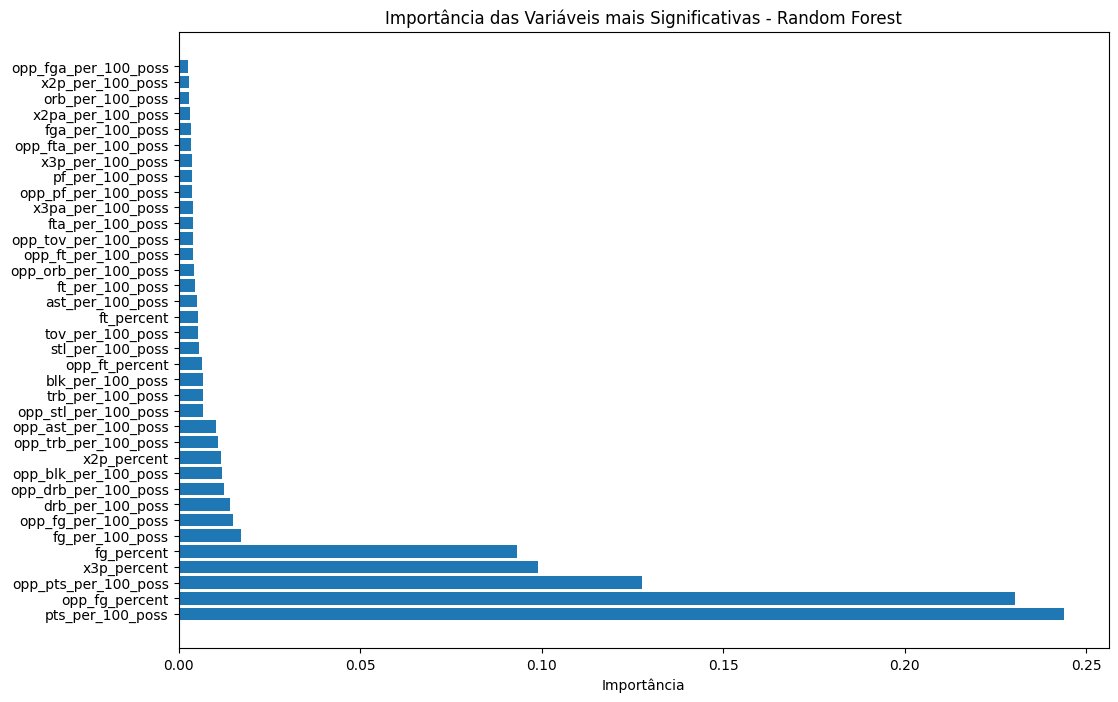

In [ ]:
# Resultados da importância das variáveis do Random Forest
importancias = [
    0.24391981963079581, 0.23036160344937628, 0.1275657459649357, 0.09886350073737155,
    0.09331386341878337, 0.017138041034263824, 0.014993187998188592, 0.01417834797465012,
    0.012555976272320924, 0.01185223742452676, 0.011779345154922728, 0.010956505288425181,
    0.010403000382323722, 0.006811005983172987, 0.006687878043159182, 0.006591595977794117,
    0.006576891489991919, 0.0057182553701757765, 0.005468624861383187, 0.0052065396596908155,
    0.004973320554585318, 0.004576833649230509, 0.004242891007484742, 0.0040819639091589565,
    0.004050997367312593, 0.0040496959513887645, 0.0038483840064507547, 0.0037189510966746035,
    0.0036481288996042583, 0.0035708911997977847, 0.003390830785777022, 0.0032892375859673185,
    0.0030540162273578345, 0.002983665316551271, 0.0029366668889045052, 0.0026415594375010076
]

# Nomes das colunas do DataFrame
nomes_colunas = [
    'fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
    'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss', 'x2pa_per_100_poss',
    'x2p_percent', 'ft_per_100_poss', 'fta_per_100_poss', 'ft_percent',
    'orb_per_100_poss', 'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
    'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss', 'pf_per_100_poss',
    'pts_per_100_poss', 'opp_fg_per_100_poss', 'opp_fga_per_100_poss', 'opp_fg_percent',
    'opp_ft_per_100_poss', 'opp_fta_per_100_poss', 'opp_ft_percent', 'opp_orb_per_100_poss',
    'opp_drb_per_100_poss', 'opp_trb_per_100_poss', 'opp_ast_per_100_poss',
    'opp_stl_per_100_poss', 'opp_blk_per_100_poss', 'opp_tov_per_100_poss',
    'opp_pf_per_100_poss', 'opp_pts_per_100_poss', 'w%'
]

# Mapeando os índices dos atributos para as importâncias
atributos_indices = [20, 23, 35, 5, 2, 0, 21, 13, 28, 32, 8, 29, 30, 31, 14, 17, 26, 16, 18, 11, 15, 9, 27, 24, 33, 10, 4, 34, 19, 3, 25, 1, 7, 12, 6, 22]

# Criar uma lista de tuplas com o índice, nome da coluna e importância
atributos_importancia = [(idx, nomes_colunas[i], importancias[idx]) for idx, i in enumerate(atributos_indices)]

# Ordenar os atributos por importância
atributos_importancia.sort(key=lambda x: x[2], reverse=True)

# Selecionar os atributos mais importantes
maiores_importancias = atributos_importancia[:36]

# Separar os nomes e importâncias para o gráfico
nomes_atributos = [nome for _, nome, _ in maiores_importancias]
importancias_atributos = [importancia for _, _, importancia in maiores_importancias]

# Criar gráfico
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(nomes_atributos))
plt.barh(y_pos, importancias_atributos, align='center')
plt.yticks(y_pos, nomes_atributos)
plt.xlabel('Importância')
plt.title('Importância das Variáveis mais Significativas - Random Forest')

# Exibir gráfico
plt.show()

In [ ]:
# Resultados da importância das variáveis do Random Forest (novamente, com os valores atualizados fornecidos)
importancias = [
    0.24391981963079581, 0.23036160344937628, 0.1275657459649357, 0.09886350073737155,
    0.09331386341878337, 0.017138041034263824, 0.014993187998188592, 0.01417834797465012,
    0.012555976272320924, 0.01185223742452676, 0.011779345154922728, 0.010956505288425181,
    0.010403000382323722, 0.006811005983172987, 0.006687878043159182, 0.006591595977794117,
    0.006576891489991919, 0.0057182553701757765, 0.005468624861383187, 0.0052065396596908155,
    0.004973320554585318, 0.004576833649230509, 0.004242891007484742, 0.0040819639091589565,
    0.004050997367312593, 0.0040496959513887645, 0.0038483840064507547, 0.0037189510966746035,
    0.0036481288996042583, 0.0035708911997977847, 0.003390830785777022, 0.0032892375859673185,
    0.0030540162273578345, 0.002983665316551271, 0.0029366668889045052, 0.0026415594375010076
]

# Nomes das colunas do DataFrame
nomes_colunas = [
    'fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
    'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss', 'x2pa_per_100_poss',
    'x2p_percent', 'ft_per_100_poss', 'fta_per_100_poss', 'ft_percent',
    'orb_per_100_poss', 'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
    'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss', 'pf_per_100_poss',
    'pts_per_100_poss', 'opp_fg_per_100_poss', 'opp_fga_per_100_poss', 'opp_fg_percent',
    'opp_ft_per_100_poss', 'opp_fta_per_100_poss', 'opp_ft_percent', 'opp_orb_per_100_poss',
    'opp_drb_per_100_poss', 'opp_trb_per_100_poss', 'opp_ast_per_100_poss',
    'opp_stl_per_100_poss', 'opp_blk_per_100_poss', 'opp_tov_per_100_poss',
    'opp_pf_per_100_poss', 'opp_pts_per_100_poss', 'w%'
]

# Mapeando os índices dos atributos para as importâncias
atributos_indices = [20, 23, 35, 5, 2, 0, 21, 13, 28, 32, 8, 29, 30, 31, 14, 17, 26, 16, 18, 11, 15, 9, 27, 24, 33, 10, 4, 34, 19, 3, 25, 1, 7, 12, 6, 22]

# Criar uma lista de tuplas com o índice, nome da coluna e importância
atributos_importancia = [(idx, nomes_colunas[i], importancias[idx]) for idx, i in enumerate(atributos_indices)]

# Ordenar os atributos por importância
atributos_importancia.sort(key=lambda x: x[2], reverse=True)

# Exibir a tabela formatada
print("Lista de atributos ordenados por importância:")
for idx, nome, importancia in atributos_importancia:
    print(f"{nome} - Importância = {importancia}")


Lista de atributos ordenados por importância:
pts_per_100_poss - Importância = 0.24391981963079581
opp_fg_percent - Importância = 0.23036160344937628
opp_pts_per_100_poss - Importância = 0.1275657459649357
x3p_percent - Importância = 0.09886350073737155
fg_percent - Importância = 0.09331386341878337
fg_per_100_poss - Importância = 0.017138041034263824
opp_fg_per_100_poss - Importância = 0.014993187998188592
drb_per_100_poss - Importância = 0.01417834797465012
opp_drb_per_100_poss - Importância = 0.012555976272320924
opp_blk_per_100_poss - Importância = 0.01185223742452676
x2p_percent - Importância = 0.011779345154922728
opp_trb_per_100_poss - Importância = 0.010956505288425181
opp_ast_per_100_poss - Importância = 0.010403000382323722
opp_stl_per_100_poss - Importância = 0.006811005983172987
trb_per_100_poss - Importância = 0.006687878043159182
blk_per_100_poss - Importância = 0.006591595977794117
opp_ft_percent - Importância = 0.006576891489991919
stl_per_100_poss - Importância = 0.005

Diante deste resultado, optamos por trabalhar com um conjunto mais reduzido, contendo as 13 variáveis de maior score. Este valor foi escolhido observando que há um "salto" maior da importância do 13o para o 14o atributo.

In [ ]:
# Reduzindo o conjunto de atributos
test_size = 0.20 # tamanho do conjunto de teste
seed = 12 # semente aleatória

selected_columns = ["pts_per_100_poss","opp_fg_percent","opp_pts_per_100_poss","x3p_percent","fg_percent","fg_per_100_poss","opp_fg_per_100_poss",
                    "drb_per_100_poss","opp_drb_per_100_poss","opp_blk_per_100_poss","x2p_percent","opp_trb_per_100_poss","opp_ast_per_100_poss"]

# Separação em conjuntos de treino e teste
X_selected = df_filtrado2012[selected_columns]
y_selected = df_filtrado2012["w%"]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected,
    test_size=test_size, shuffle=True, random_state=seed) # holdout SEM estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

**Escolha dos Modelos**

Vamos optar por alguns modelos dentre os mais usados para problemas de regressão. São eles:

* Regressão Linear: Modelo simples que assume uma relação linear entre as variáveis independentes e a variável dependente. É um ponto de partida comum para problemas de regressão devido à sua simplicidade e interpretabilidade. A regressão linear é eficaz quando a relação entre as variáveis é realmente linear, mas pode falhar em capturar padrões complexos.

* Ridge Regression: Uma extensão da regressão linear que inclui uma penalização pelo tamanho dos coeficientes (L2 regularization). Isso ajuda a reduzir a complexidade do modelo e a evitar o sobreajuste, especialmente em cenários com multicolinearidade (quando variáveis independentes estão altamente correlacionadas). Ao penalizar os coeficientes, o Ridge mantém todos os atributos no modelo, mas reduz sua influência.

* Lasso Regression: Semelhante à Ridge, mas utiliza uma penalização L1, que pode resultar em coeficientes exatamente iguais a zero para algumas variáveis, efetivamente realizando a seleção de variáveis. Isso é útil para simplificar o modelo e melhorar a interpretabilidade, mantendo apenas as variáveis mais significativas. O Lasso é especialmente eficaz em cenários onde há muitas variáveis que podem não ser relevantes.

* Árvores de Decisão: Modelos não lineares que dividem o espaço de entrada em regiões retangulares, permitindo capturar interações complexas entre variáveis. Fácil de interpretar, pois as decisões podem ser visualizadas. Útil quando há relações não lineares ou interações entre variáveis que não podem ser capturadas por modelos lineares. No entanto, podem ser suscetíveis ao sobreajuste.

* Random Forest: Um ensemble de árvores de decisão que melhora a robustez e a precisão do modelo. Reduz o risco de sobreajuste que pode ocorrer com uma única árvore de decisão. Boa performance em diversos tipos de dados e menos sensível a outliers. A importância das variáveis pode ser facilmente avaliada, o que auxilia na interpretação do modelo.

* Gradient Boosting: Outro método de ensemble que combina várias árvores de decisão sequencialmente, onde cada árvore corrige os erros da anterior. Alto desempenho em competições de machine learning devido à sua eficácia em capturar padrões complexos. É mais sensível a sobreajustes, mas pode ser ajustado com regularização.

* AdaBoostRegressor: Método de ensemble que combina múltiplos modelos fracos (geralmente árvores de decisão rasas) para criar um modelo forte. Adaptável a diferentes tipos de problemas de regressão e funções de perda. O AdaBoost ajusta os pesos dos modelos fracos com base nos erros cometidos, focando em melhorar a previsão para os casos que foram mal tratados nas iterações anteriores.

* Support Vector Regression (SVR): Baseia-se em um conceito de margens, tentando encontrar uma função que tenha a menor quantidade de erro em relação a um limite de tolerância. Pode ser ajustado para um trade-off entre complexidade do modelo e erro de treinamento. É eficaz em cenários de alta dimensionalidade e pode lidar bem com outliers.

* K-Nearest Neighbors (KNN): Um método de regressão baseado em instâncias que faz previsões com base nos K vizinhos mais próximos em um espaço de características. A regulação de K permite controlar a suavidade da previsão: valores menores de K podem ser mais sensíveis ao ruído, enquanto valores maiores tendem a suavizar as previsões. O KNN é simples de implementar e interpretar, mas pode ser computacionalmente caro em conjuntos de dados grandes, pois requer calcular distâncias para todos os pontos no conjunto de treino.

Para cada um dos modelos acima, testaremos dois datasets: um completo e o outro com as variáveis com maior importância pelo modelo Random Forest.

LR: Com dataset completo: 0.001691 (0.000395) - Com seleção de variáveis pelo RF: 0.001581 (0.000437)
Ridge: Com dataset completo: 0.001593 (0.000366) - Com seleção de variáveis pelo RF: 0.001559 (0.000403)
Lasso: Com dataset completo: 0.022002 (0.003130) - Com seleção de variáveis pelo RF: 0.022002 (0.003130)
CART: Com dataset completo: 0.009317 (0.002754) - Com seleção de variáveis pelo RF: 0.007320 (0.003439)
RF: Com dataset completo: 0.003719 (0.000821) - Com seleção de variáveis pelo RF: 0.003335 (0.000854)
GB: Com dataset completo: 0.002836 (0.000739) - Com seleção de variáveis pelo RF: 0.002812 (0.000861)
Ada: Com dataset completo: 0.004535 (0.000970) - Com seleção de variáveis pelo RF: 0.004318 (0.001007)
SVR: Com dataset completo: 0.006200 (0.000764) - Com seleção de variáveis pelo RF: 0.004860 (0.000562)
KNN: Com dataset completo: 0.004291 (0.000838) - Com seleção de variáveis pelo RF: 0.002716 (0.000611)


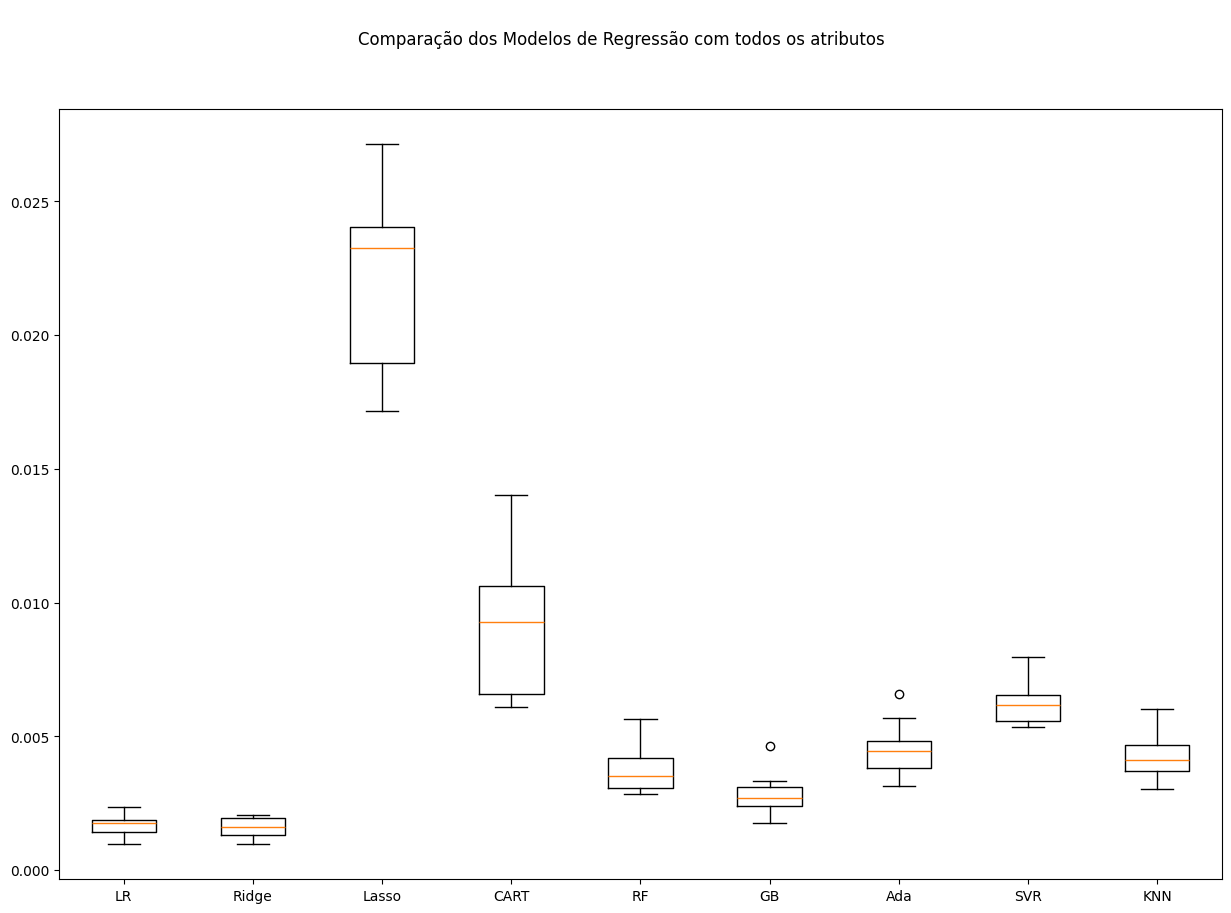

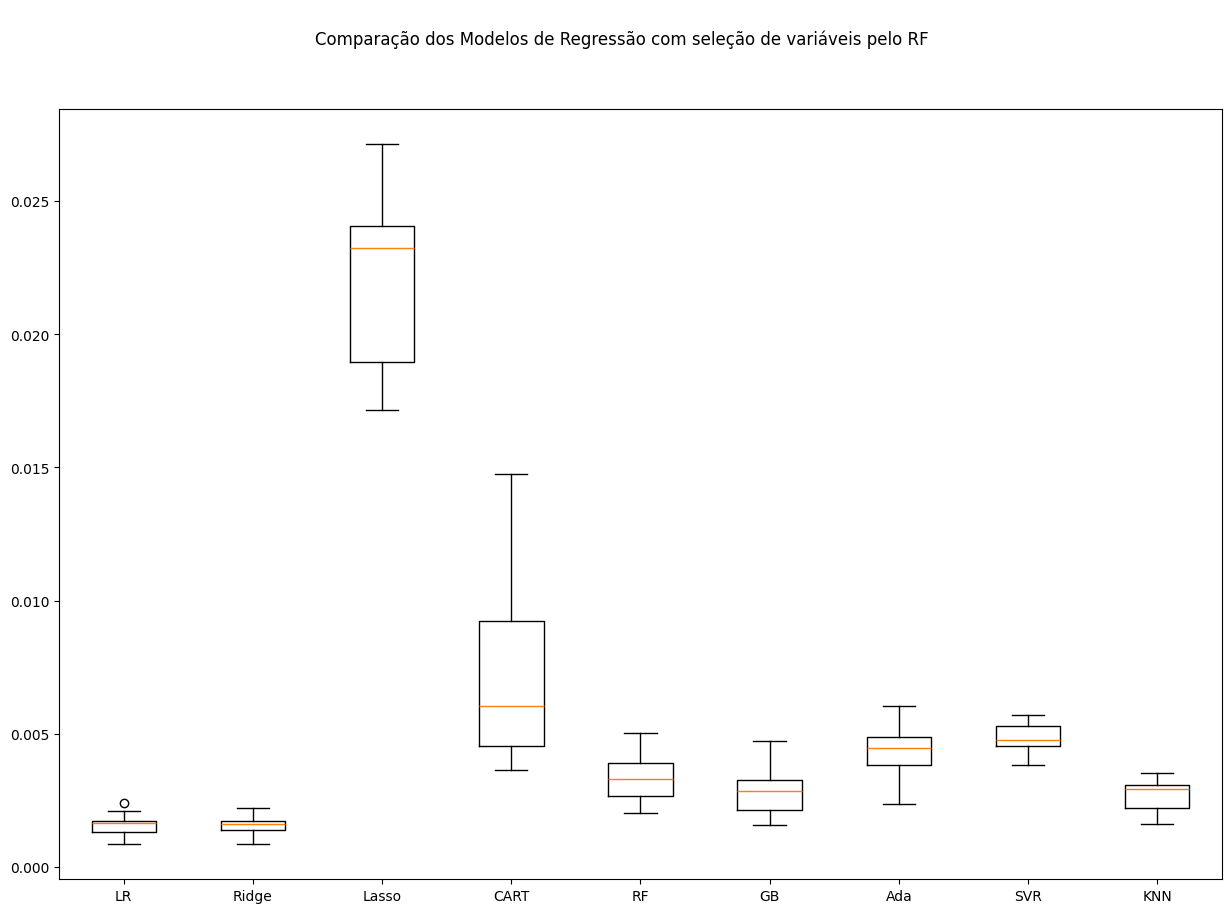

In [ ]:
# Avaliação dos modelos escolhidos

# Definindo uma semente global para este bloco
np.random.seed(42)

# Lista que armazenará os modelos
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators=100)))
models.append(('GB', GradientBoostingRegressor(n_estimators=100)))
models.append(('Ada', AdaBoostRegressor(n_estimators=100)))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))

# Listas para armazenar os resultados
results = []
results_selected = []
names = []

# Definindo o KFold para validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Avaliação dos modelos
for name, model in models:
    # Avaliação utilizando cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results_selected = cross_val_score(model, X_train_selected, y_train_selected, cv=kfold, scoring='neg_mean_squared_error')
    results.append(-cv_results)  # Negamos porque o scikit-learn retorna valores negativos para MSE
    results_selected.append(-cv_results_selected)
    names.append(name)
    msg = "%s: Com dataset completo: %f (%f) - Com seleção de variáveis pelo RF: %f (%f)" % (name, np.mean(-cv_results), np.std(-cv_results), np.mean(-cv_results_selected), np.std(-cv_results_selected))
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('\nComparação dos Modelos de Regressão com todos os atributos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15, 10))
fig.suptitle('\nComparação dos Modelos de Regressão com seleção de variáveis pelo RF')
ax = fig.add_subplot(111)
plt.boxplot(results_selected)
ax.set_xticklabels(names)
plt.show()

Mesmo ajustando a seed algumas vezes, o resultado sempre indicou dois modelos mais promissores para o problema: Linear Regression e Ridge Regression.



Entretanto, temos uma decisão a tomar. Utilizando todo o dataset, tivemos um menor RMSE. Trabalhando com o conjunto de atributos reduzido pelo Random Forest, tivemos menor MSE.

Um MSE menor indica que o modelo está está se saindo melhor em prever os valores. Já um RMSE menor indica que suas previsões são, em média, mais precisas.

Optaremos por valorizar o MSE, e prosseguiremos o MVP com o conjunto de atributos reduzido.

Entretanto, vamos usar o pipeline com todos os métodos testados anteriormente, para verificar se a normalização ou padronização podem nos indicar novos modelos candidatos.

LR-orig: 0.00158 (0.00044)
Ridge-orig: 0.00156 (0.00040)
CART-orig: 0.00806 (0.00487)
RF-orig: 0.00337 (0.00100)
GB-orig: 0.00282 (0.00087)
Ada-orig: 0.00423 (0.00096)
SVR-orig: 0.00486 (0.00056)
KNN-orig: 0.00272 (0.00061)
LR-padr: 0.00158 (0.00044)
Ridge-padr: 0.00158 (0.00043)
CART-padr: 0.00759 (0.00305)
RF-padr: 0.00329 (0.00098)
GB-padr: 0.00280 (0.00087)
Ada-padr: 0.00418 (0.00078)
SVR-padr: 0.00467 (0.00090)
KNN-padr: 0.00423 (0.00101)
LR-norm: 0.00158 (0.00044)
Ridge-norm: 0.00223 (0.00046)
CART-norm: 0.00804 (0.00395)
RF-norm: 0.00338 (0.00090)
GB-norm: 0.00282 (0.00085)
Ada-norm: 0.00416 (0.00093)
SVR-norm: 0.00447 (0.00091)
KNN-norm: 0.00428 (0.00090)


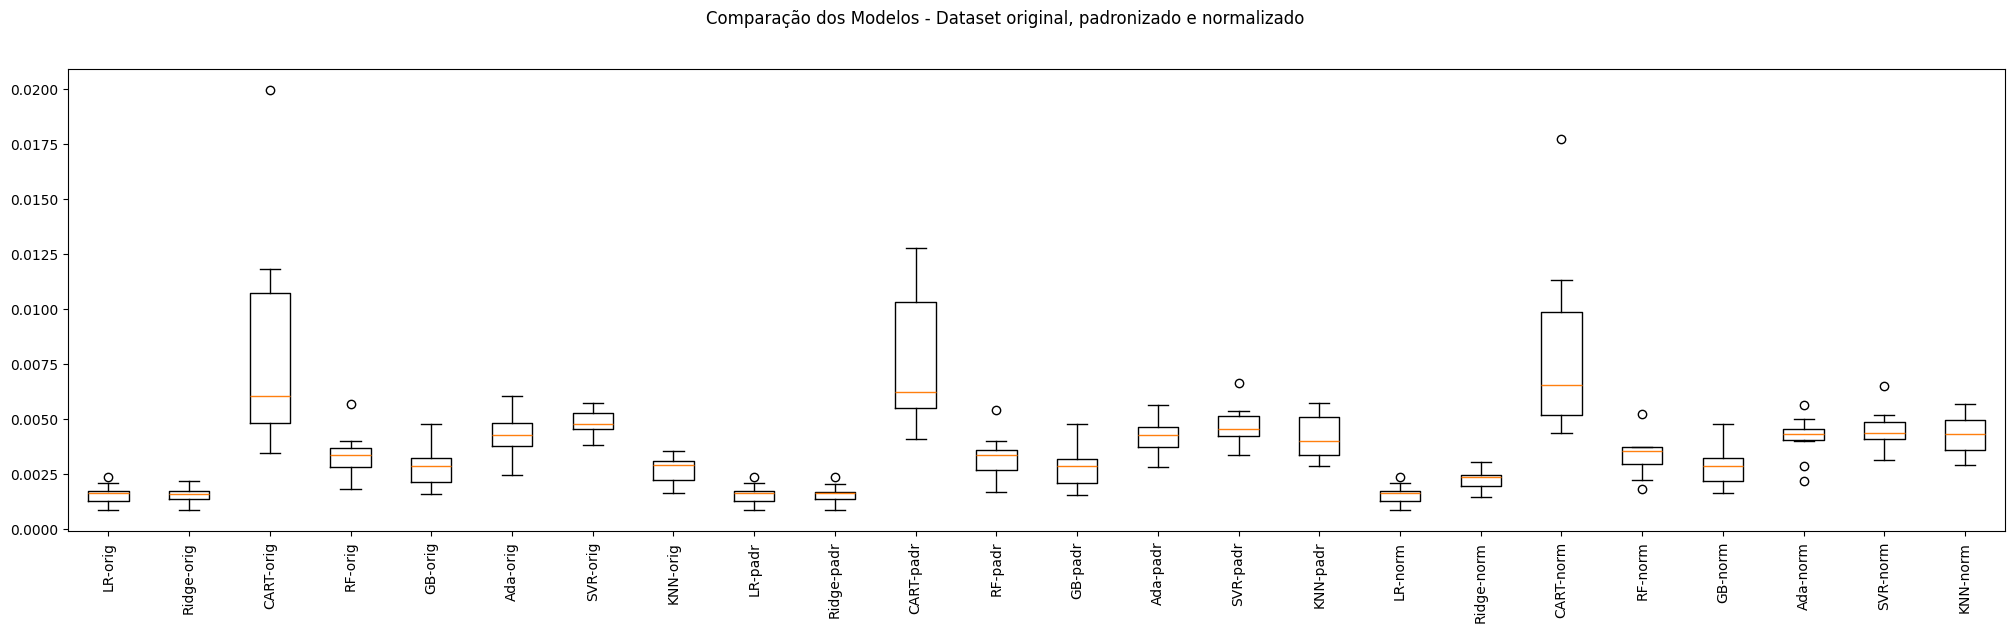

In [ ]:
# Avaliação de modelos com pipeline

# Definindo uma semente global para este bloco
np.random.seed(42)

# Listas para armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline
# Algoritmos que serão utilizados
reg_log = ('LR', LinearRegression())
ridge = (('Ridge', Ridge()))
cart = ('CART', DecisionTreeRegressor())
random_forest = ('RF', RandomForestRegressor(n_estimators=100))
gradient_boosting = ('GB', GradientBoostingRegressor(n_estimators=100))
adaboost = ('Ada', AdaBoostRegressor(n_estimators=100))
svr = (('SVR', SVR()))
knn = (('KNN', KNeighborsRegressor()))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines
# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('Ridge-orig', Pipeline([ridge])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('SVR-orig', Pipeline([svr])))
pipelines.append(('KNN-orig', Pipeline([knn])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('SVR-padr', Pipeline([standard_scaler, svr])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('SVR-norm', Pipeline([min_max_scaler, svr])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))

# Definindo o KFold para validação cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

# Executando os pipelines
scoring = 'neg_mean_squared_error'  # Usando MSE como métrica de avaliação

for name, model in pipelines:
    #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    cv_results = cross_val_score(model, X_train_selected, y_train_selected, cv=kfold, scoring=scoring)
    results.append(-cv_results)  # Negamos porque o scikit-learn retorna valores negativos para MSE
    names.append(name)
    msg = "%s: %.5f (%.5f)" % (name, -cv_results.mean(), cv_results.std())  # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25, 6))
fig.suptitle('Comparação dos Modelos - Dataset original, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Podemos observar pelo gráfico que, para alguns métodos, a normalização ou padronização melhorou os resultados, e em outros, ela piorou.

Para os modelos de Linear e Ridge Regression, que continuaram os melhores métodos no geral, a normalização e padronização não trouxe ganhos.

Desta forma, seguiremos com dois modelos: LR-original e Ridge-original.

**Otimização de Hiperparâmetros**

O método Linear Regression não tem hiperparâmetros para otimizar. Mas vamos obter o score do modelo, segundo o coeficiente de determinação.



In [ ]:
# Dividir os dados em conjuntos de treino e teste
#X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2, random_state=seed)

# Definir o modelo de Regressão Linear
lr = LinearRegression()

# Definir uma grade de hiperparâmetros (neste caso, não há hiperparâmetros, mas podemos ajustar o fit_intercept)
param_grid = {
    'fit_intercept': [True, False]  # Apenas para ilustrar, pois não é um ajuste significativo
}

# Usar GridSearchCV para encontrar o melhor valor de fit_intercept
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train_selected)

# Melhor hiperparâmetro encontrado
best_fit_intercept = grid_search.best_params_['fit_intercept']
print(f"Melhor valor de fit_intercept: {best_fit_intercept}")

# Melhor modelo treinado
best_model = grid_search.best_estimator_

# Avaliar o modelo nos dados de teste
test_score = best_model.score(X_test_selected, y_test_selected)
print(f"Score do modelo nos dados de teste: {test_score:.4f}")

Melhor valor de fit_intercept: False
Score do modelo nos dados de teste: 0.9377


Para o método Ridge Regression, vamos tentar ver qual o melhor valor de alpha, e avaliar o score do modelo ajustando este hiperparâmetro.

In [ ]:
# Dividir os dados em conjuntos de treino e teste
#X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2, random_state=seed)

# Definir o modelo de Regressão Ridge
ridge = Ridge()

# Definir a grade de hiperparâmetros para otimização
param_grid = {
    'alpha': np.logspace(-4, 4, 100)  # Valores de alpha para testar
}

# Usar GridSearchCV para encontrar o melhor valor de alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train_selected, y_train_selected)

# Melhor hiperparâmetro encontrado
best_alpha = grid_search.best_params_['alpha']
print(f"Melhor valor de alpha: {best_alpha}")

# Melhor modelo treinado
best_model = grid_search.best_estimator_

# Avaliar o modelo nos dados de teste
test_score = best_model.score(X_test_selected, y_test_selected)
print(f"Score do modelo nos dados de teste: {test_score:.4f}")

Melhor valor de alpha: 0.026560877829466867
Score do modelo nos dados de teste: 0.9376


Tivemos desempenhos com score bem próximos entre os dois modelos.

**Avaliação dos modelos escolhidos**

Vamos agora exibir a distribuição dos resíduos para cada um dos modelos, para observar se ela segue uma tendência.

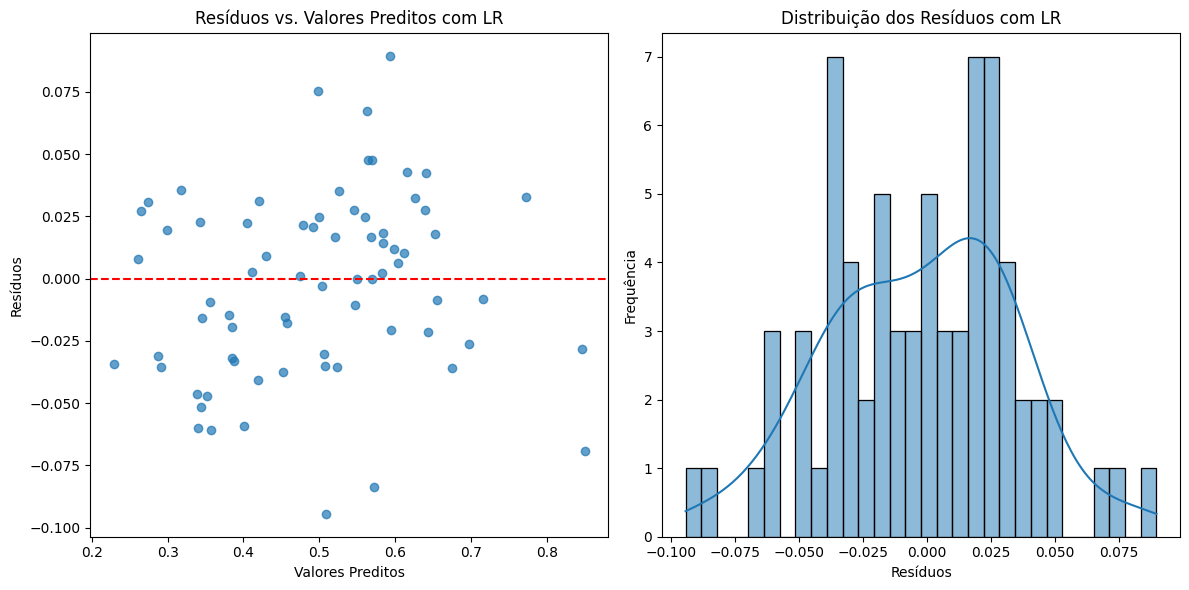

In [ ]:
# Dividir os dados em conjuntos de treino e teste
#X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2, random_state=seed)

# Treinar o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train_selected, y_train_selected)

# Fazer previsões com o modelo
y_pred = model.predict(X_test_selected)

# Calcular os resíduos
residuos = y_test_selected - y_pred

# Visualizar os resíduos
plt.figure(figsize=(12, 6))

# Gráfico de Dispersão dos Resíduos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Preditos com LR')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')

# Histogramas dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribuição dos Resíduos com LR')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

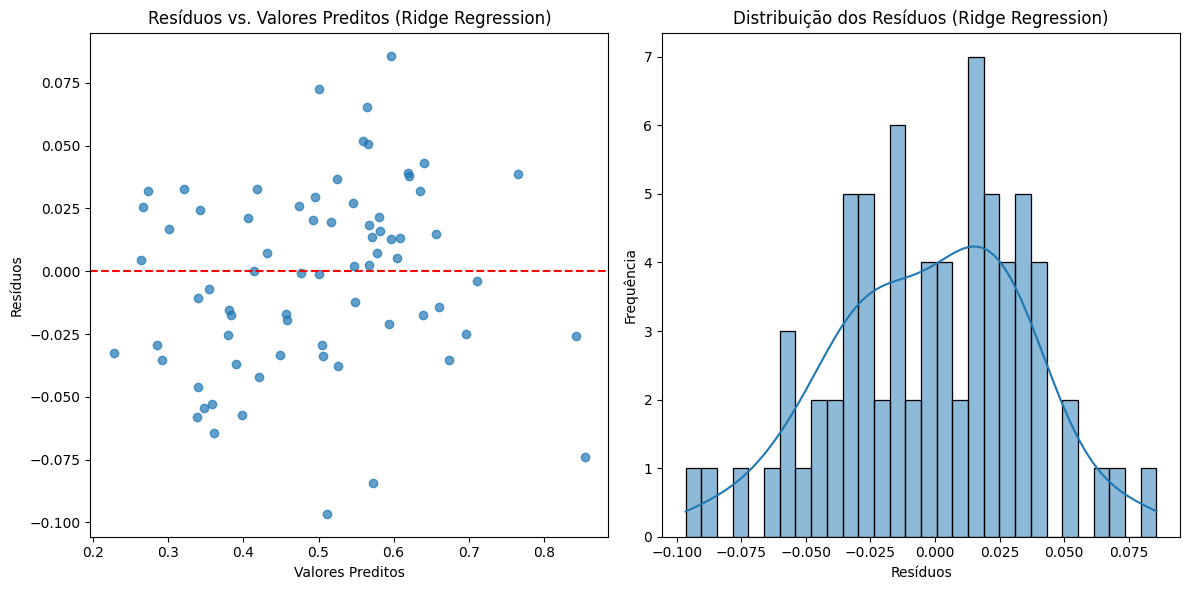

In [ ]:
# Dividir os dados em conjuntos de treino e teste
#X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X, y, test_size=0.2, random_state=seed)

# Treinar o modelo de Ridge Regression
ridge = Ridge(alpha=best_alpha)  # usando o melhor alpha
ridge.fit(X_train_selected, y_train_selected)

# Fazer previsões com o modelo
y_pred = ridge.predict(X_test_selected)

# Calcular os resíduos
residuos = y_test_selected - y_pred

# Visualizar os resíduos
plt.figure(figsize=(12, 6))

# Gráfico de Dispersão dos Resíduos
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Resíduos vs. Valores Preditos (Ridge Regression)')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')

# Histogramas dos Resíduos
plt.subplot(1, 2, 2)
sns.histplot(residuos, bins=30, kde=True)
plt.title('Distribuição dos Resíduos (Ridge Regression)')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Os resíduos mostram desvios, mas seguem uma tendência, o que parece ser  aceitável para o problema.

Agora iremos testar os modelos e calculas métricas de avaliação de modelos de regressão:

* Erro Quadrático Médio (MSE - Mean Squared Error): média dos quadrados das diferenças entre os valores reais e os valores preditos. Um MSE menor indica que o modelo tem um desempenho melhor em prever os valores.

* Raiz do Erro Quadrático Médio (RMSE - Root Mean Squared Error): raiz quadrada do MSE. Ele fornece uma medida da magnitude do erro nas mesmas unidades que a variável dependente. Assim como o MSE, um RMSE menor indica um melhor desempenho do modelo.

* Erro Absoluto Médio (MAE - Mean Absolute Error): média das diferenças absolutas entre os valores reais e os valores preditos. Um MAE menor indica que, em média, o modelo é mais preciso ao prever os valores. O MAE pode ser mais intuitivo do que o MSE, pois está na mesma unidade dos dados.

* Coeficiente de Determinação (R² - R-squared): O R² mede a proporção da variância na variável dependente que é previsível a partir da variável independente. O R² varia de 0 a 1. Um R² de 1 indica que o modelo explica toda a variância dos dados, enquanto um R² de 0 indica que o modelo não tem nenhum poder preditivo.



In [ ]:
# Criando o modelo LR com o conjunto de treino
lr_model = LinearRegression()
#lr_model.fit(X_train, y_train) # Reshape X_train to a 2D array
lr_model.fit(X_train_selected, y_train_selected) # Reshape X_train to a 2D array

# Fazendo as predições com o conjunto de teste
#lr_predictions = lr_model.predict(X_test) # Reshape X_test to a 2D array
lr_predictions = lr_model.predict(X_test_selected) # Reshape X_test to a 2D array

lr_mae = mean_absolute_error(y_test_selected, lr_predictions)
lr_mse = mean_squared_error(y_test_selected, lr_predictions)
lr_rmse = mean_squared_error(y_test_selected, lr_predictions, squared=False)  # MSE com squared=False retorna RMSE
lr_r2 = r2_score(y_test_selected, lr_predictions)

# Exibir os resultados
print(f"Erro Absoluto Médio (MAE): {lr_mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {lr_mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {lr_rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {lr_r2:.4f}")

Erro Absoluto Médio (MAE): 0.0300
Erro Quadrático Médio (MSE): 0.0013
Raiz do Erro Quadrático Médio (RMSE): 0.0366
Coeficiente de Determinação (R²): 0.9386


In [ ]:
# Criando o modelo Ridge com o conjunto de treino
ridge_model = Ridge(alpha=21.5)  # alpha otimizado
#ridge_model.fit(X_train, y_train)  # Treinando o modelo
ridge_model.fit(X_train_selected, y_train_selected)  # Treinando o modelo

# Fazendo as predições com o conjunto de teste
#ridge_predictions = ridge_model.predict(X_test)  # Predições no conjunto de teste
ridge_predictions = ridge_model.predict(X_test_selected)  # Predições no conjunto de teste

ridge_mae = mean_absolute_error(y_test_selected, ridge_predictions)
ridge_mse = mean_squared_error(y_test_selected, ridge_predictions)
ridge_rmse = mean_squared_error(y_test_selected, ridge_predictions, squared=False)  # MSE com squared=False retorna RMSE
ridge_r2 = r2_score(y_test_selected, ridge_predictions)

# Exibir os resultados
print(f"Erro Absoluto Médio (MAE): {ridge_mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {ridge_mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {ridge_rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {ridge_r2:.4f}")

Erro Absoluto Médio (MAE): 0.0304
Erro Quadrático Médio (MSE): 0.0014
Raiz do Erro Quadrático Médio (RMSE): 0.0373
Coeficiente de Determinação (R²): 0.9364


Podemos observar que os resultados foram bons com ambos os modelos, com ligeira vantagem para Linear Regression.

**Testando a aplicação do modelo em dados não vistos**

Para testar os dois modelos com um novo conjunto de dados, buscamos uma outra fonte de dados, com as informações da atual temporada de 2024-25. Ela se iniciou em outubro, e estava com cerca de 30% se seus jogos disputados no momento desta coleta.

In [ ]:
# Informar a URL onde um dos arquivos do dataset foi armazenado
# Obs: arquivos baixados do site Basketball Reference em 10/12/2024 e salvos no Github

url1_24 = "https://raw.githubusercontent.com/diogomattos1/mvp-machine-learning/refs/heads/main/team-stats-per100-poss-2024.csv"
url2_24 = "https://raw.githubusercontent.com/diogomattos1/mvp-machine-learning/refs/heads/main/opponent-stats-per-100-poss-2024.csv"
url3_24 = "https://raw.githubusercontent.com/diogomattos1/mvp-machine-learning/refs/heads/main/team-summaries-2024.csv"

In [ ]:
# Ler os arquivos
df1_24 = pd.read_csv(url1_24, delimiter=',')
df2_24 = pd.read_csv(url2_24, delimiter=',')
df3_24 = pd.read_csv(url3_24, delimiter=',')

In [ ]:
# Restringir um dos arquivos a apenas os seus dados úteis ao problema
df4_24 = df3_24[['Team','W']]

In [ ]:
# Realizar o merge entre os dois arquivos
df_merge_24 = pd.merge(df1_24, df2_24, on=['Team'])

# Fazer a junção com o DataFrame atual
df_merge_24 = pd.merge(df_merge_24, df4_24, on=['Team'], how='left')

In [ ]:
# Ajustando nomes das colunas para minúsculas
df_merge_24.columns = df_merge_24.columns.str.lower()

#print(df_merge_24.columns)  # Para verificar os nomes das colunas

In [ ]:
# Criar a coluna target - 'w%'
df_merge_24['w%'] = (df_merge_24['w'] / df_merge_24['g_x'])

# Remover as colunas 'g', 'w' do dataframe df_filtrado2012
df_merge_24.drop(['g_x', 'g_y', 'w'], axis=1, inplace=True)

#print(df_merge_24.columns)

In [ ]:
print(df_merge_24.columns)

Index(['rk_x', 'team', 'mp_x', 'fg_x', 'fga_x', 'fg%_x', '3p_x', '3pa_x',
       '3p%_x', '2p_x', '2pa_x', '2p%_x', 'ft_x', 'fta_x', 'ft%_x', 'orb_x',
       'drb_x', 'trb_x', 'ast_x', 'stl_x', 'blk_x', 'tov_x', 'pf_x', 'pts_x',
       'rk_y', 'mp_y', 'fg_y', 'fga_y', 'fg%_y', '3p_y', '3pa_y', '3p%_y',
       '2p_y', '2pa_y', '2p%_y', 'ft_y', 'fta_y', 'ft%_y', 'orb_y', 'drb_y',
       'trb_y', 'ast_y', 'stl_y', 'blk_y', 'tov_y', 'pf_y', 'pts_y', 'w%'],
      dtype='object')


In [ ]:
# Remover as colunas que não estão no dataset original
df_merge_24.drop(['rk_x'], axis=1, inplace=True)
df_merge_24.drop(['mp_x'], axis=1, inplace=True)
df_merge_24.drop(['rk_y'], axis=1, inplace=True)
df_merge_24.drop(['mp_y'], axis=1, inplace=True)
df_merge_24.drop(['team'], axis=1, inplace=True)

In [ ]:
# Substituindo a terminação '_x' por '_per_100_poss' nos nomes das colunas
df_merge_24.columns = [col.replace('_x', '_per_100_poss') if col.endswith('_x') else col for col in df_merge_24.columns]

# Incluindo 'opp_' no início das variáveis referentees a dados dos oponentes
df_merge_24.columns = [
    'opp_' + col[:-2] + '_per_100_poss' if col.endswith('_y') else col
    for col in df_merge_24.columns
]

# Modificando os nomes das colunas que contêm '%'
df_merge_24.columns = [
    col.replace('%', '_percent').replace('_per_100_poss', '') if '%' in col else col
    for col in df_merge_24.columns
]

df_merge_24 = df_merge_24.rename(columns={'w_percent': 'w%'})

#print(df_merge_24.columns)  # Para verificar os novos nomes das colunas

In [ ]:
#Renomeando colunas para ficarem com mesmo nome do dataset original
df_merge_24 = df_merge_24.rename(columns={'3p_per_100_poss': 'x3p_per_100_poss'})
df_merge_24 = df_merge_24.rename(columns={'3pa_per_100_poss': 'x3pa_per_100_poss'})
df_merge_24 = df_merge_24.rename(columns={'3p_percent': 'x3p_percent'})
df_merge_24 = df_merge_24.rename(columns={'2p_per_100_poss': 'x2p_per_100_poss'})
df_merge_24 = df_merge_24.rename(columns={'2pa_per_100_poss': 'x2pa_per_100_poss'})
df_merge_24 = df_merge_24.rename(columns={'2p_percent': 'x2p_percent'})

In [ ]:
# Remover as colunas que não estão no dataset original
df_merge_24.drop([
    'opp_3p_per_100_poss',
    'opp_3pa_per_100_poss',
    'opp_3p_percent',
    'opp_2p_per_100_poss',
    'opp_2pa_per_100_poss',
    'opp_2p_percent'], axis=1, inplace=True)

In [ ]:
print(df_merge_24.columns)

Index(['fg_per_100_poss', 'fga_per_100_poss', 'fg_percent', 'x3p_per_100_poss',
       'x3pa_per_100_poss', 'x3p_percent', 'x2p_per_100_poss',
       'x2pa_per_100_poss', 'x2p_percent', 'ft_per_100_poss',
       'fta_per_100_poss', 'ft_percent', 'orb_per_100_poss',
       'drb_per_100_poss', 'trb_per_100_poss', 'ast_per_100_poss',
       'stl_per_100_poss', 'blk_per_100_poss', 'tov_per_100_poss',
       'pf_per_100_poss', 'pts_per_100_poss', 'opp_fg_per_100_poss',
       'opp_fga_per_100_poss', 'opp_fg_percent', 'opp_ft_per_100_poss',
       'opp_fta_per_100_poss', 'opp_ft_percent', 'opp_orb_per_100_poss',
       'opp_drb_per_100_poss', 'opp_trb_per_100_poss', 'opp_ast_per_100_poss',
       'opp_stl_per_100_poss', 'opp_blk_per_100_poss', 'opp_tov_per_100_poss',
       'opp_pf_per_100_poss', 'opp_pts_per_100_poss', 'w%'],
      dtype='object')


In [ ]:
# Selecionar as colunas necessárias

training_features = ["pts_per_100_poss","opp_fg_percent","opp_pts_per_100_poss","x3p_percent","fg_percent","fg_per_100_poss","opp_fg_per_100_poss",
                    "drb_per_100_poss","opp_drb_per_100_poss","opp_blk_per_100_poss","x2p_percent","opp_trb_per_100_poss","opp_ast_per_100_poss"]

# 'X_new' recebe os atributos selecionados
X_new = df_merge_24[training_features]

# 'y_real' é a coluna que contém os valores reais
y_new = df_merge_24["w%"]

In [ ]:
# Fazer previsões com Ridge
ridge_predictions = ridge_model.predict(X_new)

ridge_mae = mean_absolute_error(y_new, ridge_predictions)
ridge_mse = mean_squared_error(y_new, ridge_predictions)
ridge_rmse = mean_squared_error(y_new, ridge_predictions, squared=False)  # MSE com squared=False retorna RMSE
ridge_r2 = r2_score(y_new, ridge_predictions)

# Exibir os resultados
print(f"Erro Absoluto Médio (MAE): {ridge_mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {ridge_mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {ridge_rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {ridge_r2:.4f}")

Erro Absoluto Médio (MAE): 0.0527
Erro Quadrático Médio (MSE): 0.0040
Raiz do Erro Quadrático Médio (RMSE): 0.0634
Coeficiente de Determinação (R²): 0.8681


In [ ]:
# Previsões do modelo Ridge versus valores reais
# ridge_predictions contém os valores preditos pelo modelo Ridge
# y_new contém os valores reais da variável alvo w%

# Criando uma nova tabela para comparação
comparison_df = pd.DataFrame({
    'Predições Ridge': ridge_predictions,
    'Valores Reais (w%)': y_new
})

# Exibindo a tabela de comparação
print(comparison_df)

    Predições Ridge  Valores Reais (w%)
0          0.708932            0.608696
1          0.793198            0.840000
2          0.768115            0.791667
3          0.733430            0.666667
4          0.744768            0.680000
5          0.592763            0.480000
6          0.563021            0.545455
7          0.856604            0.782609
8          0.590613            0.545455
9          0.473447            0.521739
10         0.535437            0.521739
11         0.395014            0.400000
12         0.401164            0.541667
13         0.644205            0.608696
14         0.366102            0.416667
15         0.378102            0.400000
16         0.693002            0.666667
17         0.451406            0.500000
18         0.417817            0.520000
19         0.595075            0.521739
20         0.356581            0.291667
21         0.421331            0.400000
22         0.533088            0.560000
23         0.613314            0.653846


In [ ]:
# Fazer previsões com LR
lr_predictions = lr_model.predict(X_new)


lr_mae = mean_absolute_error(y_new, lr_predictions)
lr_mse = mean_squared_error(y_new, lr_predictions)
lr_rmse = mean_squared_error(y_new, lr_predictions, squared=False)  # MSE com squared=False retorna RMSE
lr_r2 = r2_score(y_new, lr_predictions)

# Exibir os resultados
print(f"Erro Absoluto Médio (MAE): {lr_mae:.4f}")
print(f"Erro Quadrático Médio (MSE): {lr_mse:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {lr_rmse:.4f}")
print(f"Coeficiente de Determinação (R²): {lr_r2:.4f}")

Erro Absoluto Médio (MAE): 0.0518
Erro Quadrático Médio (MSE): 0.0040
Raiz do Erro Quadrático Médio (RMSE): 0.0635
Coeficiente de Determinação (R²): 0.8678


In [ ]:
# Previsões do modelo LR versus valores reais
# lr_predictions contém os valores preditos pelo modelo LR
# y_new contém os valores reais da variável alvo w%

# Criando uma nova tabela para comparação
comparison_df = pd.DataFrame({
    'Predições LR': lr_predictions,
    'Valores Reais (w%)': y_new
})

# Exibindo a tabela de comparação
print(comparison_df)

    Predições LR  Valores Reais (w%)
0       0.712990            0.608696
1       0.802835            0.840000
2       0.759170            0.791667
3       0.731413            0.666667
4       0.735944            0.680000
5       0.583069            0.480000
6       0.575682            0.545455
7       0.843524            0.782609
8       0.595821            0.545455
9       0.479225            0.521739
10      0.547453            0.521739
11      0.403664            0.400000
12      0.405387            0.541667
13      0.639450            0.608696
14      0.377115            0.416667
15      0.383312            0.400000
16      0.674049            0.666667
17      0.444593            0.500000
18      0.408491            0.520000
19      0.596081            0.521739
20      0.343596            0.291667
21      0.415419            0.400000
22      0.533284            0.560000
23      0.593757            0.653846
24      0.210196            0.217391
25      0.311959            0.291667
2

Podemos observar que trabalhando com dados novos, os modelos tiveram uma acurácia parecida, de cerca de 86%.

**Considerações finais**

Este MVP repete alguns dos passos realizados no trabalho apresentado na disciplina de Análise de Dados, e resume ou suprime outros. A idéia era condensar algumas passagens para que este trabalho funcionasse independentemente da leitura do anterior, mas que também não ficasse muito extenso de passagens que não foram o escopo da disciplina de machine learning.

A nossa proposta inicial seria que este MVP fosse uma continuação do trabalho anterior. Nele, selecionamos uma única variável - embora esta fosse uma fórmula que continha em si dados de algumas outras. De fato, ao treinar e testar modelos de machine learning com este único atributo, tivemos resultado com acurácia semelhantes aos do dataset que trabalhamos aqui.

Entretanto, à medida que fomos avançando tanto no estudo de conceitos quanto na execução de modelos de machine learning, achaamos melhor mudar o enfoque.  Acreditamos que a mudança de dataset tenha sido mais adequada para o propósito do trabalho, que seria trabalhar com aspectos do jogo em si que influenciassem o sucesso das equipes, e a partir daí testar modelos de dados com eles.

Por outro lado, podemos concluir que estas fórmulas criadas após a revolução de analytics no esporte, de fato, são boas métricas para conseguirmos determinar o sucesso dos times da NBA, e por consequência, o vencedor de uma partida.

Nos modelos que testamos neste MVP (Linear Regression e Ridge Regression)chegamos a ter bons resultados em assertividade, mas mesmo testando com diferentes conjuntos de atributos, o RMSE no teste era maior do que no treino. Vimos com gráfico de resíduo que, embora os modelos sigam uma tendência, falham ao prever outliers. Isso pode ser sinal de overfitting. Tentamos variar os parâmetros do modelo, inclusive através de otimização de hiperparâmetros, e embora tenhamos melhorado os resultados no modelo Ridge, não conseguimos grande evolução no RMSE.

O pipeline foi uma técnica que não trouxe muitos ganhos no nosso problema. Este é um assunto que gostaria de investigar mais futuramente, pois nos exemplos dados na disciplina, esta técnica apresentou sucesso.

Encontrar um modelo que preveja resultados esportivos é o Santo Graal do estudo de dados associado a esportes. Mesmo com dados massivos, há muitas maneiras de vencer: algumas equipes ganham partidas com um jogo mais ofensivo, outras apostam na defesa; umas preferem apostar em mais trocas de passes para criar melhores oportunidades e outras, acelerar o jogo e definir os ataques mais rapidamente, pegando as defesas desprevenidas.

Como pudemos observar na etapa de feature selection, os principais atributos estão relacionados a uma maior eficiência dos arremessos - e a uma baixa dos adversários. Também pudemos observar que alguns atributos, como por exemplo, o número de assistências, não infuem tanto no resultado. Mas impedir que o adversário tenha sucesso neste item tem uma correlação mais forte. De fato, faz sentido: impedir que seu adversário dê melhores passes o impede de tentar os melhores arremessos, e por consequencia diminui a sua eficiência.

Não existe um número mágico para determinar uma vitória: se a equipe marcar X pontos, pegar Y rebotes etc, ela deverá vencer a partida. Existem diferentes formas de vencer, e é isso que torna o esporte tão fascinante. Infelizmente este trabalho não conseguiu determinar qual delas seria a melhor, mas creio que possamos ter algumas pistas, pois conseguimos chegar a valores satisfatórios medindo os modelos testados.

Mas o mais importante da jornada foi passar por todas as etapas de um trabalho de machine learning com um contínuo entendimento de conceitos em paralelo ao refinamento deste MVP.

**Links Complementares**

https://www.kaggle.com/datasets/sumitrodatta/nba-aba-baa-stats - fonte do dataset usado neste trabalho.

https://www.nba.com/stats/help/glossary - glossário da NBA, com a descrição de todos os dados presentes no dataset.

https://www.sportingnews.com/us/nba/news/nba-twitter-stats-analytics-message-board-basketball/takw7w6zbj7ntzdm92stqg2f - uma breve história sobre analytics na NBA.

https://www.basketball-reference.com/leagues/NBA_2025.html - site repleto de dados atualizados da NBA, de onde foi retirado o conjunto de dados não vistos (arquivos baixados em 10/12/2024).

https://colab.research.google.com/github/diogomattos1/mvp-analise-dados/blob/main/MVP_An%C3%A1lise_Dados_Diogo_Mattos%20final.ipynb - MVP feito para a disciplina de análise de dados em setembro de 2024.